# Field Experiments - Day 1

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os
import csv

In [2]:
def read_csv_file(filename):
    rows = []
    # reading csv file
    with open(filename, 'r') as csvfile:

        # creating a csv reader object
        csvreader = csv.reader(csvfile)

        # extracting each data row one by one
        for row in csvreader:
            rows.append(row)
    data = [float(x) for x in rows[0]]
    return data

In [3]:
base_dir = os.getcwd()
base_dir

'd:\\IST\\5 ano\\2 semestre\\Tese\\FIELD EXPERIMENTS\\data (1)\\Real raspberry trials (1)\\Day1'

In [4]:
os.chdir('Harvesting data day 1')

In [5]:
dirs = [str(x) for x in range(17,58) if x not in [21, 24, 27, 29, 42, 51]]
files = ['comp_force', 'Fd', 'z_pos', 'pull_force', 'time_vector']

In [6]:
for j, directory in enumerate(dirs):
    for i, file in enumerate(os.listdir(directory)):
        locals()[files[i]+dirs[j]] = read_csv_file(directory+'/'+file)

264
199
214
154
151
205


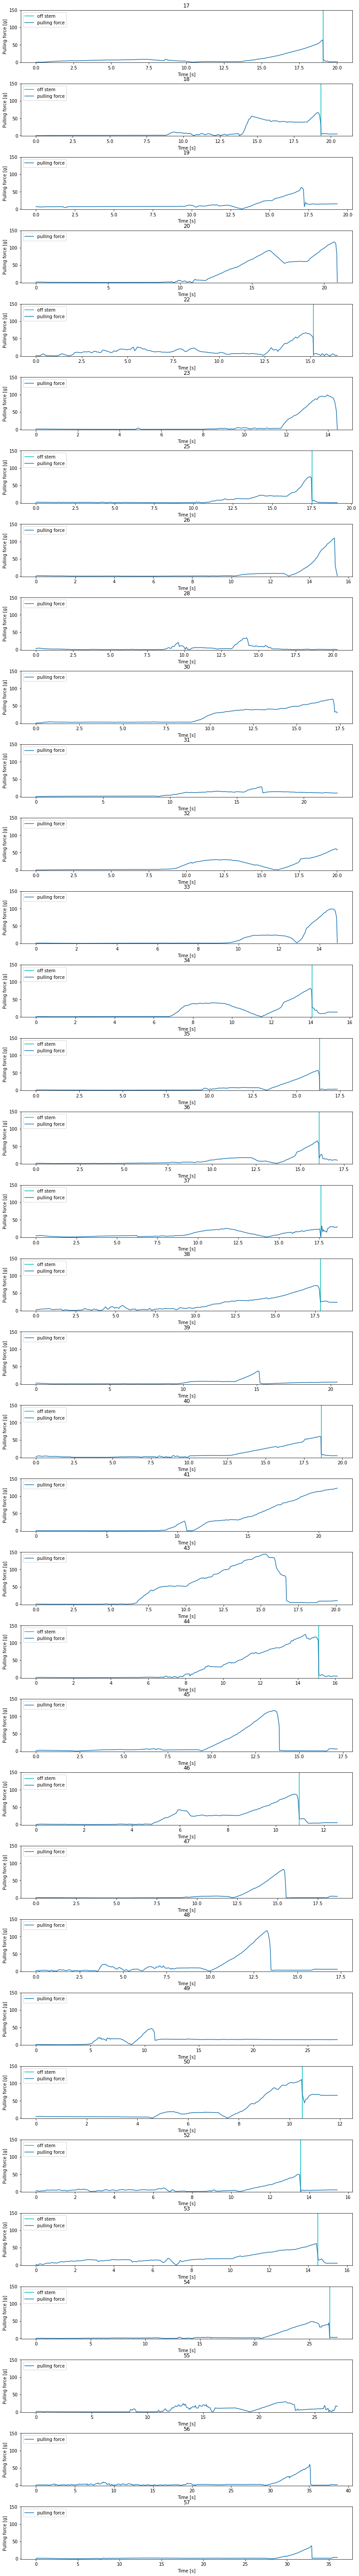

In [7]:
data_pull = [pull_force17,pull_force18,pull_force19,pull_force20,pull_force22,pull_force23,pull_force25,pull_force26,pull_force28,pull_force30,pull_force31,pull_force32,pull_force33,pull_force34,pull_force35,pull_force36,pull_force37,pull_force38,pull_force39,pull_force40,pull_force41,pull_force43,pull_force44,pull_force45,pull_force46,pull_force47,pull_force48,pull_force49,pull_force50,pull_force52,pull_force53,pull_force54,pull_force55,pull_force56,pull_force57]
times = [time_vector17,time_vector18,time_vector19,time_vector20,time_vector22,time_vector23,time_vector25,time_vector26,time_vector28,time_vector30,time_vector31,time_vector32,time_vector33,time_vector34,time_vector35,time_vector36,time_vector37,time_vector38,time_vector39,time_vector40,time_vector41,time_vector43,time_vector44,time_vector45,time_vector46,time_vector47,time_vector48,time_vector49,time_vector50,time_vector52,time_vector53,time_vector54,time_vector55,time_vector56,time_vector57]
offstem_idx = []

data = data_pull

fig, axs = plt.subplots(len(dirs), 1)
fig.set_size_inches(13,100)
for i in range(len(dirs)):
    dif_0 = 0
    for idx in range(1,len(data[i])):
        dif = data[i][idx-1]-data[i][idx]
        if dif >= dif_0:
            dif_0 = dif
            offstem = idx
    offstem_idx.append(offstem)
    plottime = np.array(times[i])-times[i][0]
    if i in [0,1,4,6,13,14,15,16,17,19,22,24,28,29,30,31]:
        axs[i].axvline(x = plottime[offstem], color = 'c',label='off stem')
        if i in [dirs.index('17'), dirs.index('34'), dirs.index('44'), dirs.index('53'), dirs.index('46'), dirs.index('50')]:
            print(offstem)
    axs[i].plot(plottime, data[i], label='pulling force')
    axs[i].set_xlabel('Time [s]')
    axs[i].set_ylabel("Pulling force [g]")
    axs[i].set_ylim([-1, 150])
    axs[i].set_title(dirs[i])
    axs[i].legend(loc="upper left")

plt.subplots_adjust(left=0.1,
                    bottom=0.1, 
                    right=0.9, 
                    top=0.9, 
                    wspace=0.4, 
                    hspace=0.4)

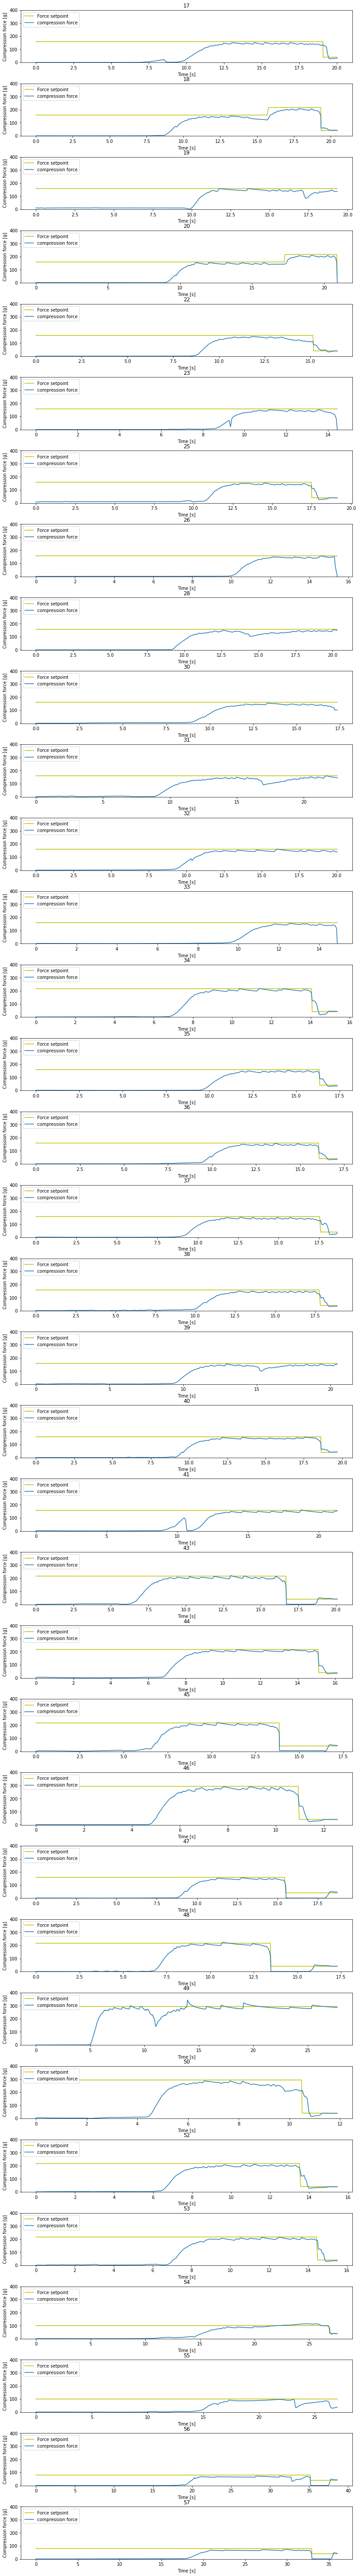

In [11]:
data_comp = [comp_force17,comp_force18,comp_force19,comp_force20,comp_force22,comp_force23,comp_force25,comp_force26,comp_force28,comp_force30,comp_force31,comp_force32,comp_force33,comp_force34,comp_force35,comp_force36,comp_force37,comp_force38,comp_force39,comp_force40,comp_force41,comp_force43,comp_force44,comp_force45,comp_force46,comp_force47,comp_force48,comp_force49,comp_force50,comp_force52,comp_force53,comp_force54,comp_force55,comp_force56,comp_force57]
times = [time_vector17,time_vector18,time_vector19,time_vector20,time_vector22,time_vector23,time_vector25,time_vector26,time_vector28,time_vector30,time_vector31,time_vector32,time_vector33,time_vector34,time_vector35,time_vector36,time_vector37,time_vector38,time_vector39,time_vector40,time_vector41,time_vector43,time_vector44,time_vector45,time_vector46,time_vector47,time_vector48,time_vector49,time_vector50,time_vector52,time_vector53,time_vector54,time_vector55,time_vector56,time_vector57]
Fd = [Fd17,Fd18,Fd19,Fd20,Fd22,Fd23,Fd25,Fd26,Fd28,Fd30,Fd31,Fd32,Fd33,Fd34,Fd35,Fd36,Fd37,Fd38,Fd39,Fd40,Fd41,Fd43,Fd44,Fd45,Fd46,Fd47,Fd48,Fd49,Fd50,Fd52,Fd53,Fd54,Fd55,Fd56,Fd57]

data = data_comp

fig, axs = plt.subplots(len(dirs), 1)
fig.set_size_inches(13,100)
for i in range(len(dirs)):
    plottime = np.array(times[i])-times[i][0]
    #if len(Fd[i]) == 1:
    Fd_vector = np.ones_like(data[i])*Fd[i][0]
    if i == 1:
        Fd_vector = np.ones(data[i].index(133.1))*Fd[i][0]
        Fd_vector = np.append(Fd_vector, np.ones(len(data[i])-data[i].index(133.1))*Fd[i][1])
    if i == 3:
        Fd_vector = np.ones(data[i].index(141.9))*Fd[i][0]
        Fd_vector = np.append(Fd_vector, np.ones(len(data[i])-data[i].index(141.9))*Fd[i][1])
    if i in [0, 1, 3, 4, 6, 13, 14, 15, 16, 17, 19, 21, 22, 23, 24, 25, 26, 28, 29, 30, 31, 33, 34]:
        Fd_vector[offstem_idx[i]::] = 40
    axs[i].plot(plottime, Fd_vector, 'y', label='Force setpoint')
    # axs[i].axvline(x = plottime[offstem_idx[i]], color = 'c',label='off stem')
    axs[i].plot(plottime, data[i], label='compression force')
    axs[i].set_xlabel('Time [s]')
    axs[i].set_ylabel("Compression force [g]")
    axs[i].set_ylim([-1, 400])
    axs[i].set_title(dirs[i])
    axs[i].legend(loc="upper left")

plt.subplots_adjust(left=0.1,
                    bottom=0.1, 
                    right=0.9, 
                    top=0.9, 
                    wspace=0.4, 
                    hspace=0.4)

In [12]:
plottime

array([ 0.        ,  0.04791069,  0.09588838,  0.15994501,  0.23988414,
        0.30390549,  0.36787868,  0.4318819 ,  0.49585152,  0.57590008,
        0.63986516,  0.70388007,  0.78387976,  0.84789014,  0.91186666,
        0.99185443,  1.0718298 ,  1.13585949,  1.19986296,  1.27985096,
        1.35982633,  1.40783858,  1.50382805,  1.58382249,  1.66384363,
        1.743819  ,  1.82380533,  1.90382171,  1.96780443,  2.04780102,
        2.12778139,  2.1918366 ,  2.27179646,  2.35177541,  2.41579008,
        2.47980404,  2.54376531,  2.62377286,  2.68780136,  2.76776934,
        2.83178926,  2.91180229,  2.97578239,  3.03976798,  3.13578916,
        3.19975209,  3.26375461,  3.3438015 ,  3.40776634,  3.48771715,
        3.55177236,  3.63173771,  3.69573641,  3.75981045,  3.83972764,
        3.90374947,  3.98369408,  4.04774046,  4.11168885,  4.17573094,
        4.25567222,  4.31969881,  4.39969897,  4.46377134,  4.52766299,
        4.60766888,  4.67182708,  4.75166059,  4.79966259,  4.87

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Text(0.5, 1.0, 'Pulling Force')

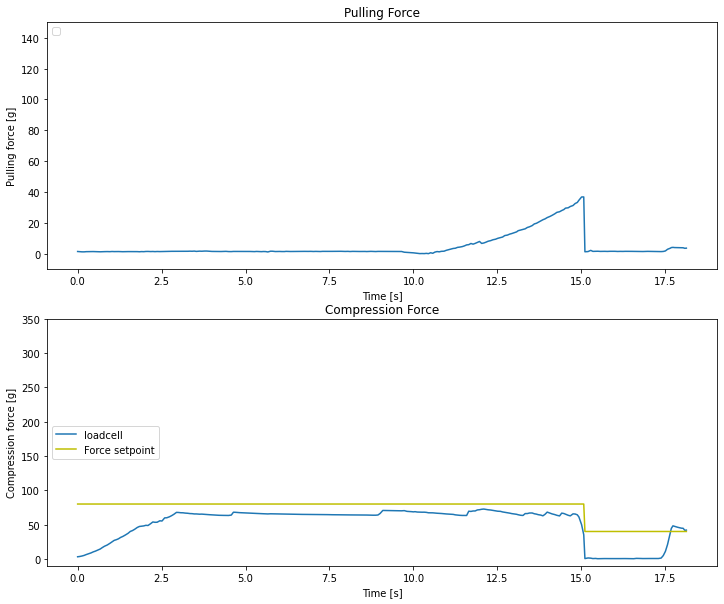

In [20]:

fig, axs = plt.subplots(2, 1)
fig.set_size_inches(12,10)
plottime = np.array(time_vector57)-time_vector57[0]
Fd_vector = np.ones_like(data[i])*Fd[-1][0]
Fd_vector[offstem_idx[-1]::] = 40

axs[1].plot(plottime[int(510/2)::]-plottime[int(510/2)], comp_force57[int(510/2)::], label='loadcell')
axs[1].set_ylabel("Compression force [g]")
axs[1].set_xlabel("Time [s]")
axs[1].set_ylim([-10,350])

axs[0].plot(plottime[int(510/2)::]-plottime[int(510/2)], pull_force57[int(510/2)::], label=None)
axs[0].set_ylabel("Pulling force [g]")
axs[0].set_xlabel("Time [s]")
axs[0].set_ylim([-10,150])

axs[1].plot(plottime[int(510/2)::]-plottime[int(510/2)], Fd_vector[int(510/2)::], 'y', label='Force setpoint')
axs[0].legend(loc="upper left")
axs[1].legend(loc="center left")
axs[1].set_title("Compression Force")
axs[0].set_title("Pulling Force")

In [15]:
len(plottime)

517

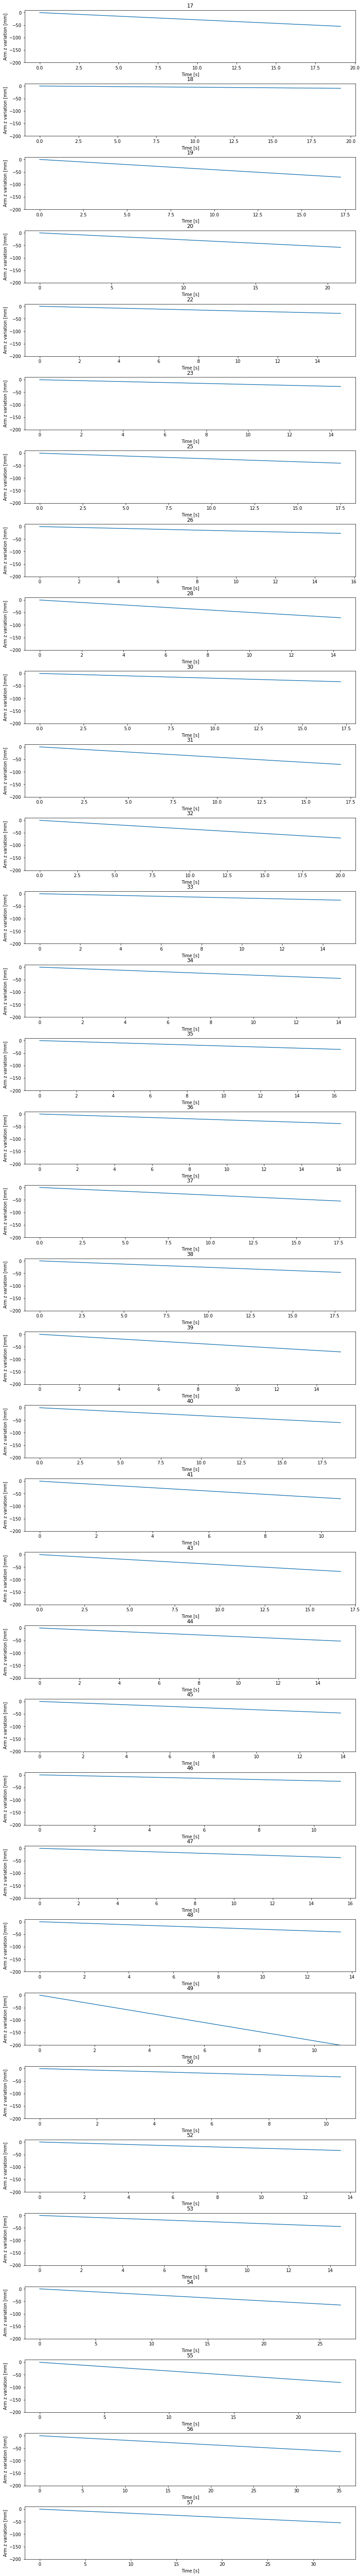

In [9]:
data_displacement = [z_pos17,z_pos18,z_pos19,z_pos20,z_pos22,z_pos23,z_pos25,z_pos26,z_pos28,z_pos30,z_pos31,z_pos32,z_pos33,z_pos34,z_pos35,z_pos36,z_pos37,z_pos38,z_pos39,z_pos40,z_pos41,z_pos43,z_pos44,z_pos45,z_pos46,z_pos47,z_pos48,z_pos49,z_pos50,z_pos52,z_pos53,z_pos54,z_pos55,z_pos56,z_pos57]
times = [time_vector17,time_vector18,time_vector19,time_vector20,time_vector22,time_vector23,time_vector25,time_vector26,time_vector28,time_vector30,time_vector31,time_vector32,time_vector33,time_vector34,time_vector35,time_vector36,time_vector37,time_vector38,time_vector39,time_vector40,time_vector41,time_vector43,time_vector44,time_vector45,time_vector46,time_vector47,time_vector48,time_vector49,time_vector50,time_vector52,time_vector53,time_vector54,time_vector55,time_vector56,time_vector57]

data = data_displacement

fig, axs = plt.subplots(len(data), 1)
fig.set_size_inches(13,100)
for i in range(len(data)):
    plottime = np.array(times[i])-times[i][0]
    axs[i].plot([plottime[0],plottime[offstem_idx[i]]], (np.array(data[i])-data[i][0])*1000, label='gripper postion')
    axs[i].set_xlabel('Time [s]')
    axs[i].set_ylabel("Arm z variation [mm]")
    axs[i].set_ylim([-200, 10])
    axs[i].set_title(dirs[i])
    # axs[i].legend(loc="center right")
    # axs[i].legend(loc="upper right")

plt.subplots_adjust(left=0.1,
                    bottom=0.1, 
                    right=0.9, 
                    top=0.9, 
                    wspace=0.4, 
                    hspace=0.4)

C:\Users\Catarina.LAPTOP-GAR6C5UR\AppData\Local\Temp\ipykernel_18732\793157229.py:11: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, axs = plt.subplots(3, 1)


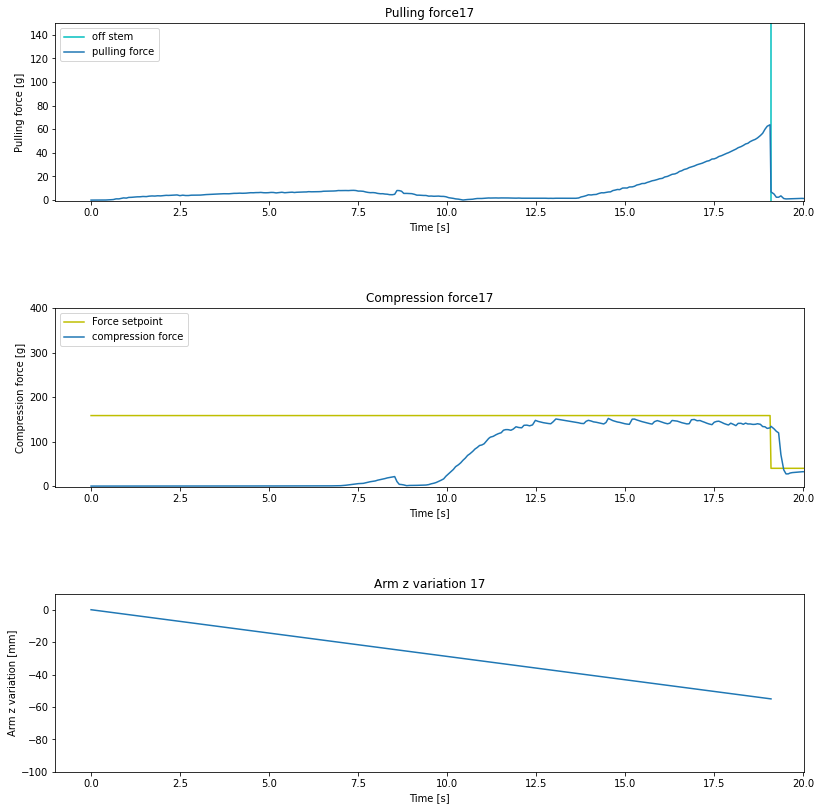

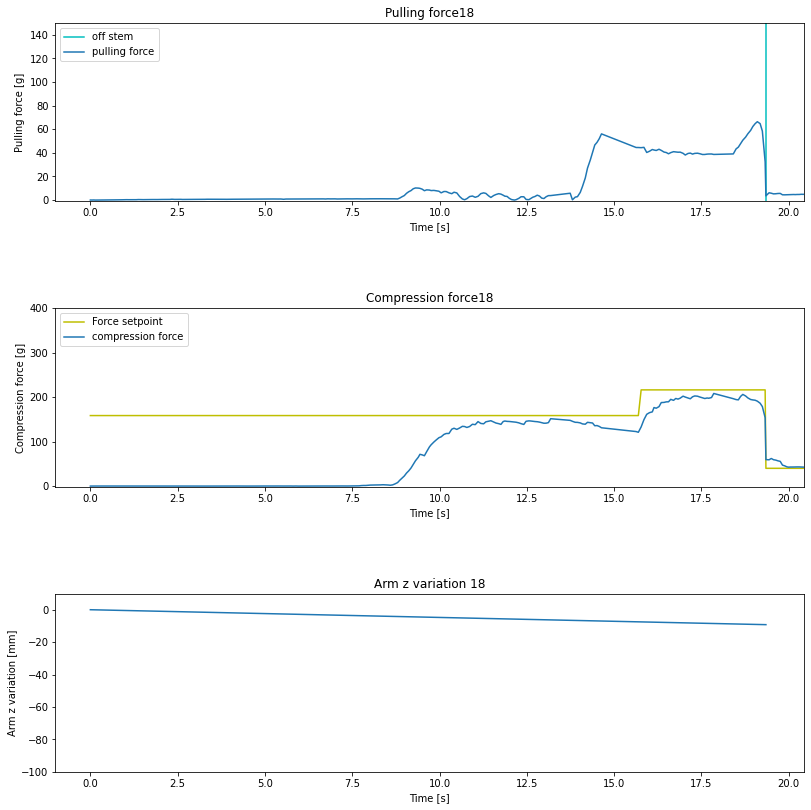

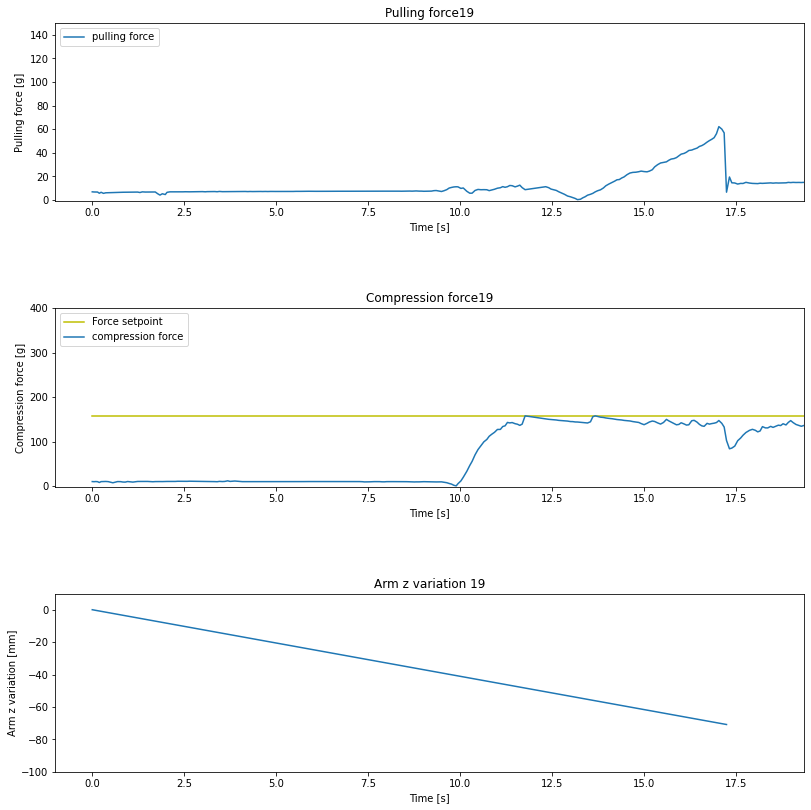

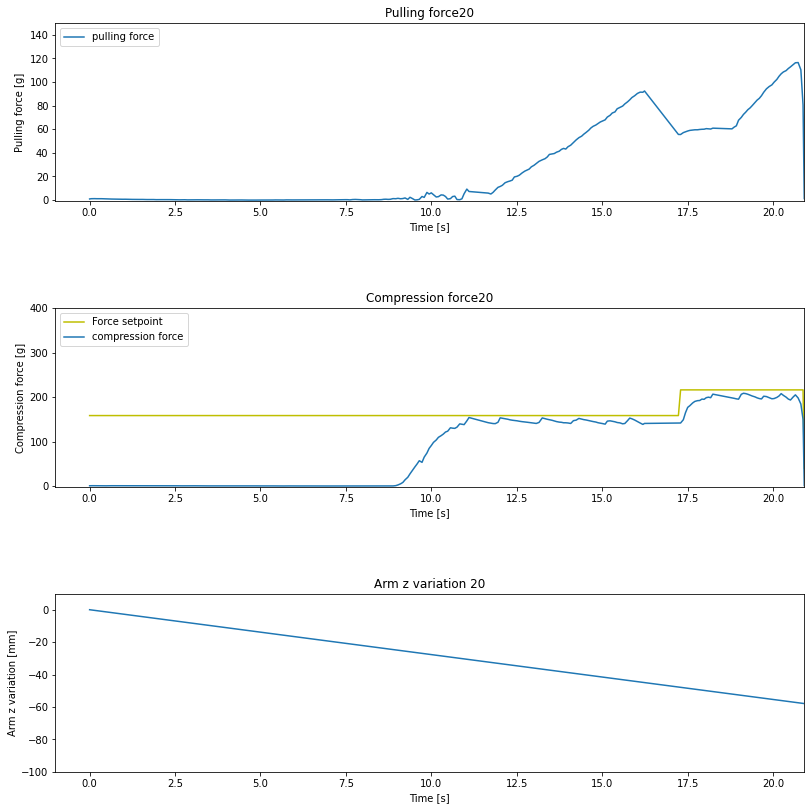

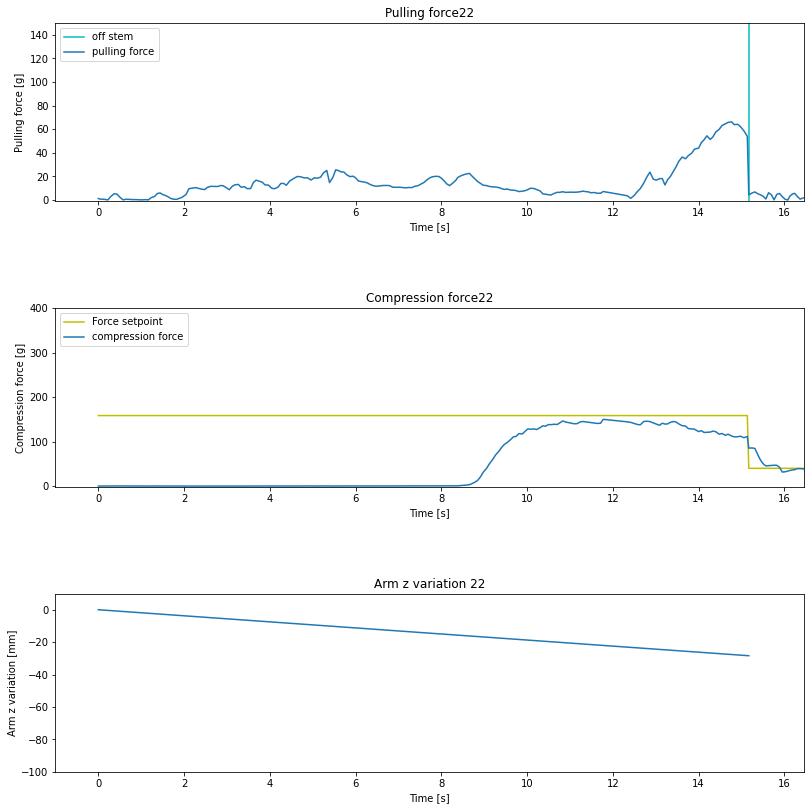

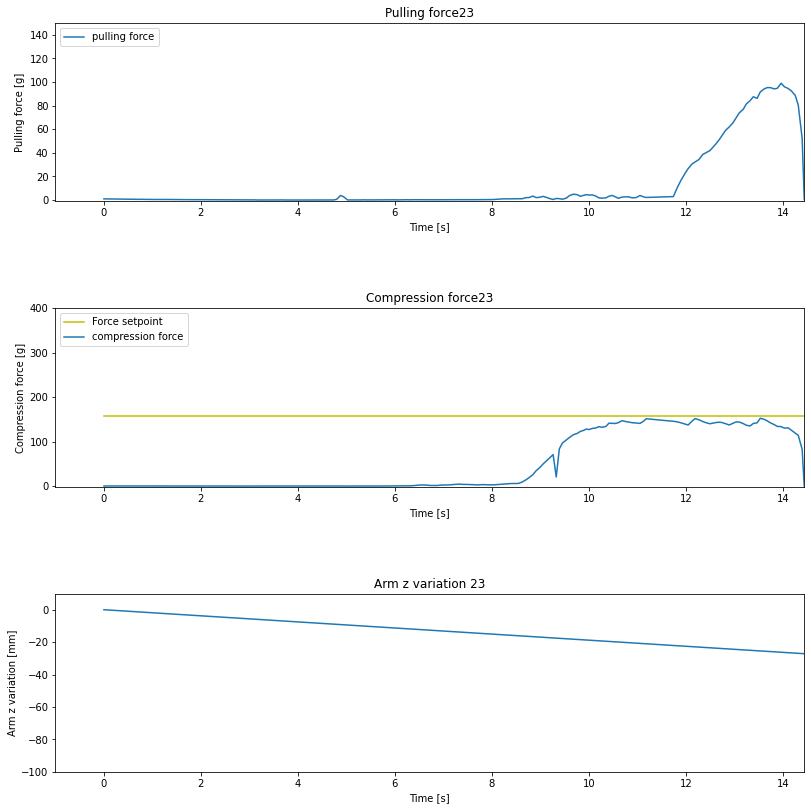

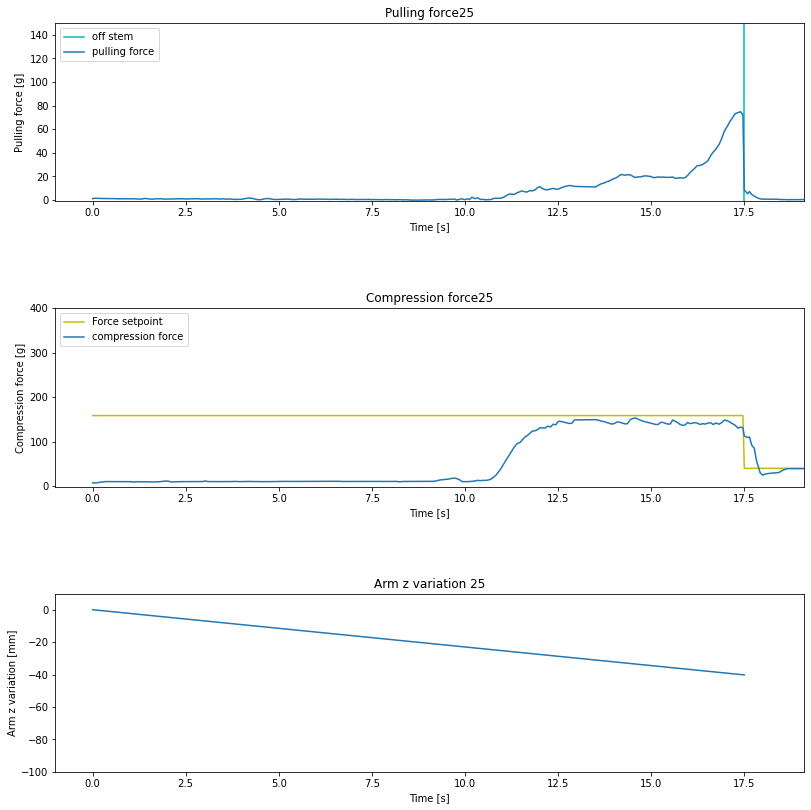

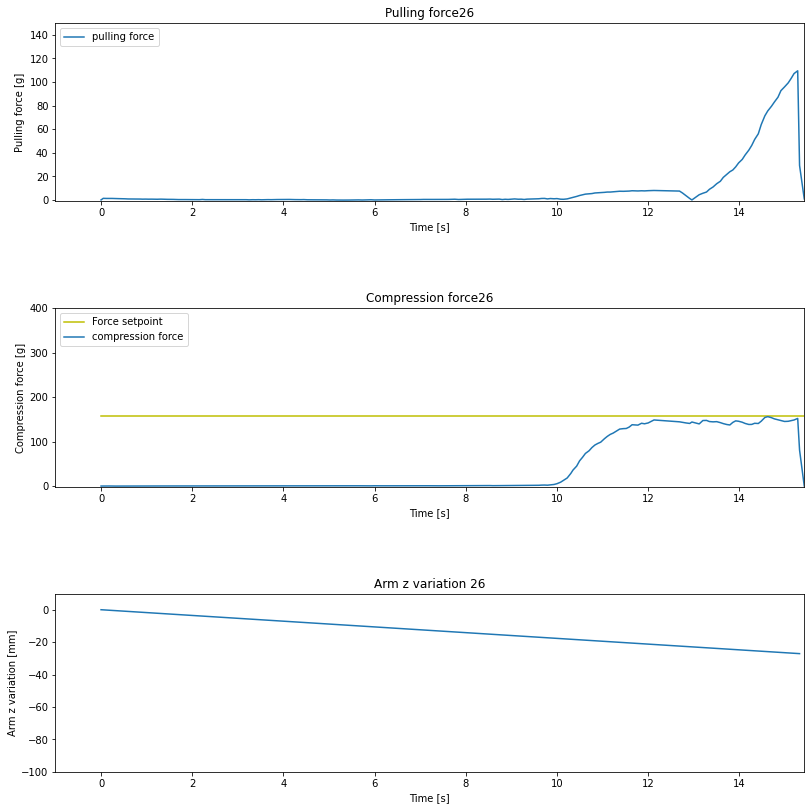

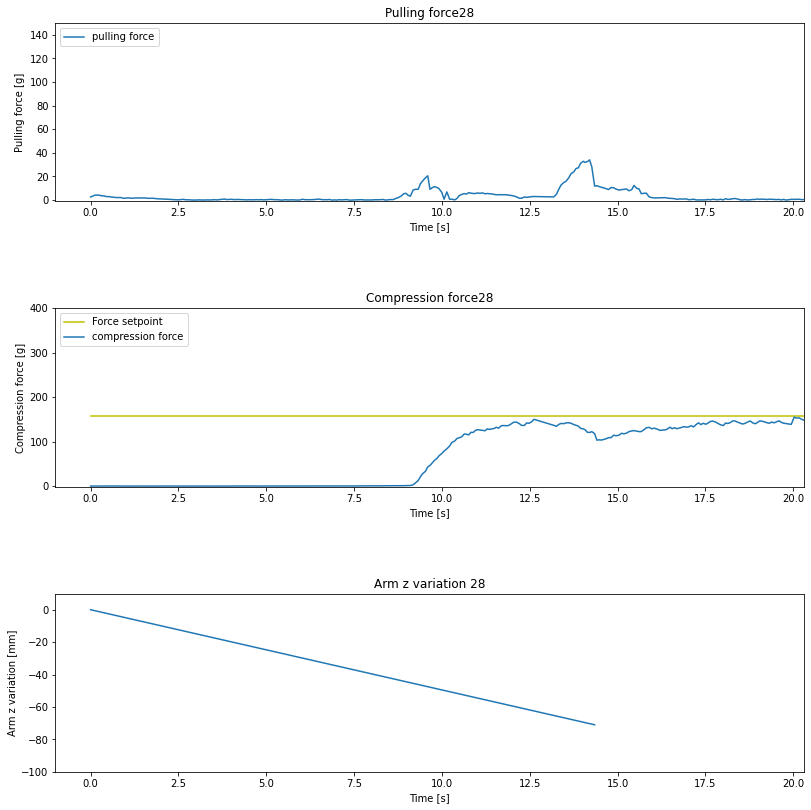

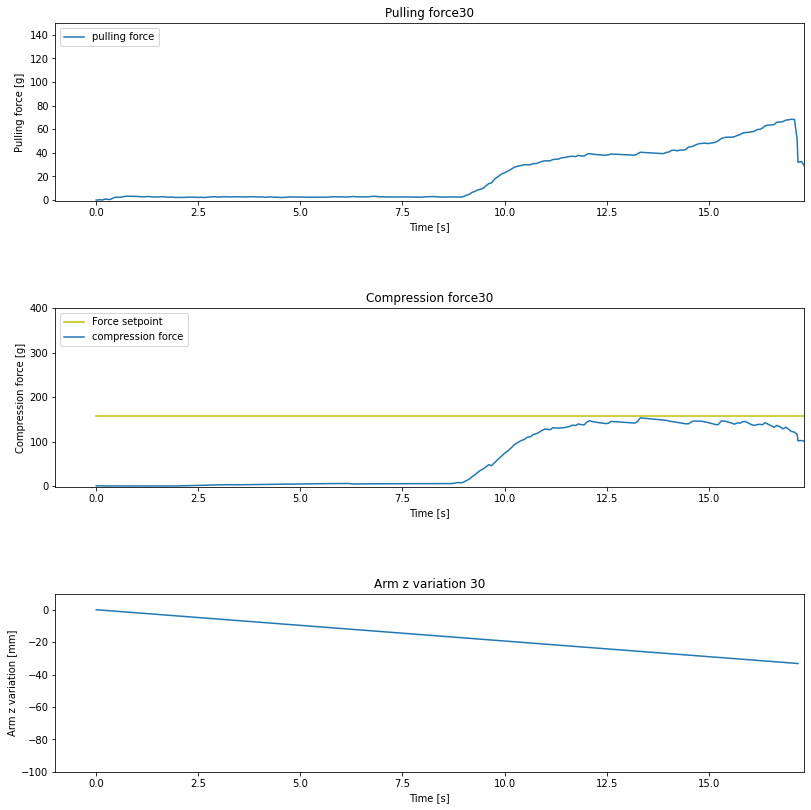

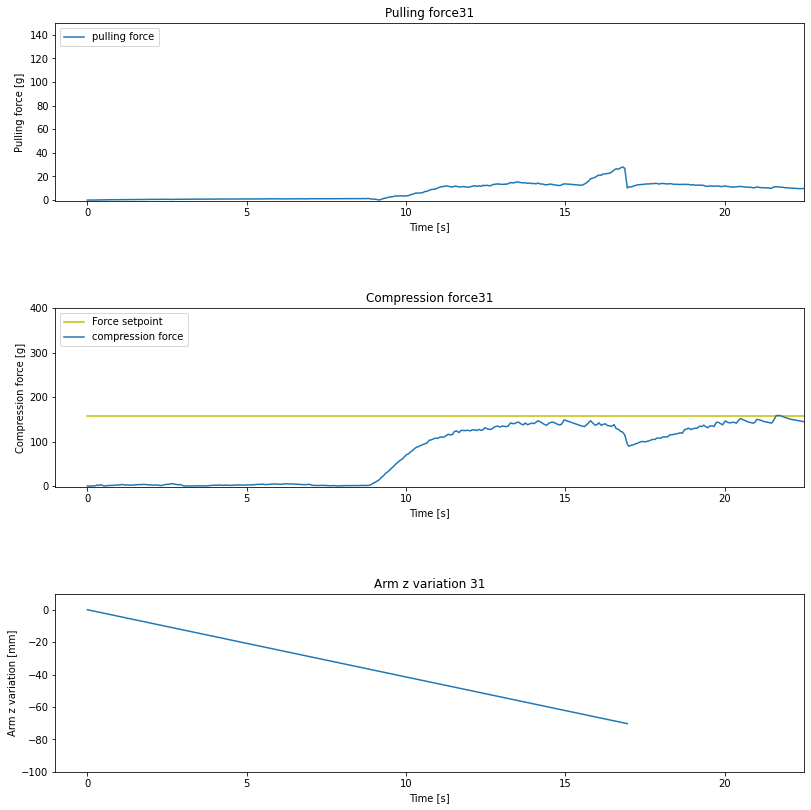

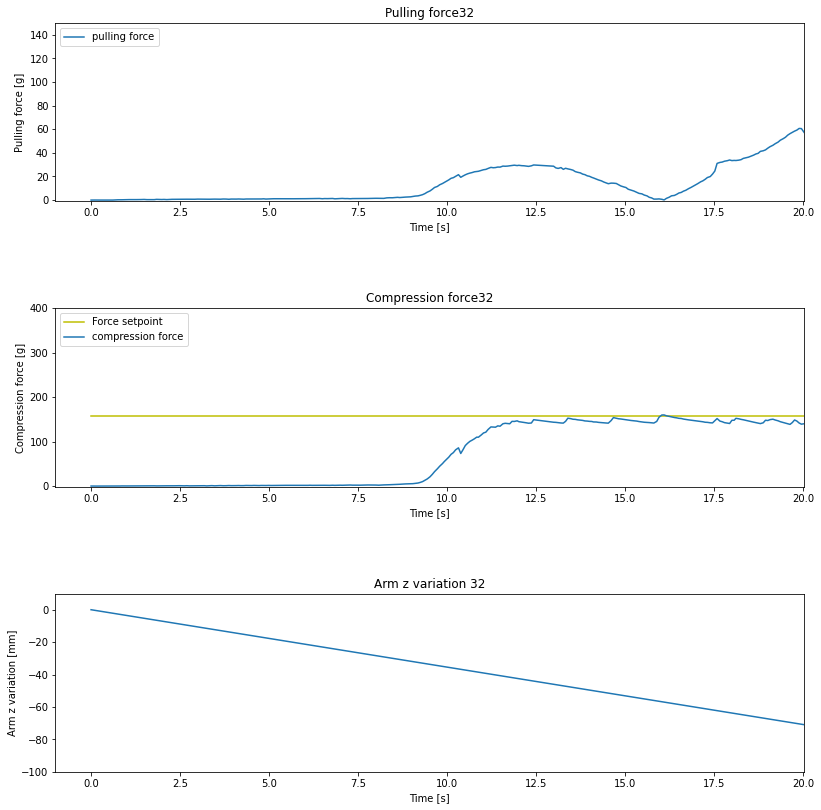

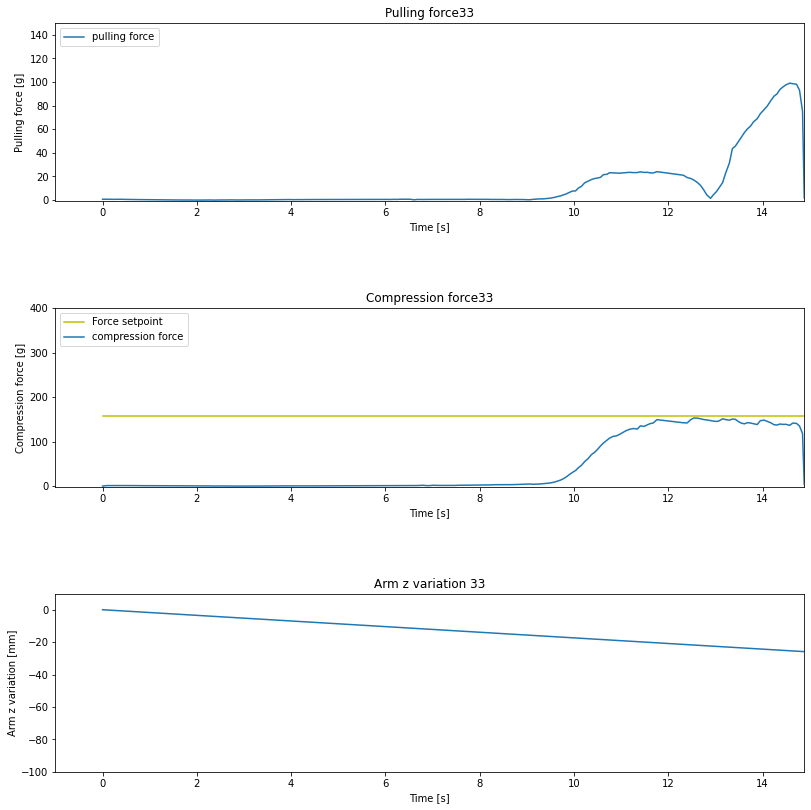

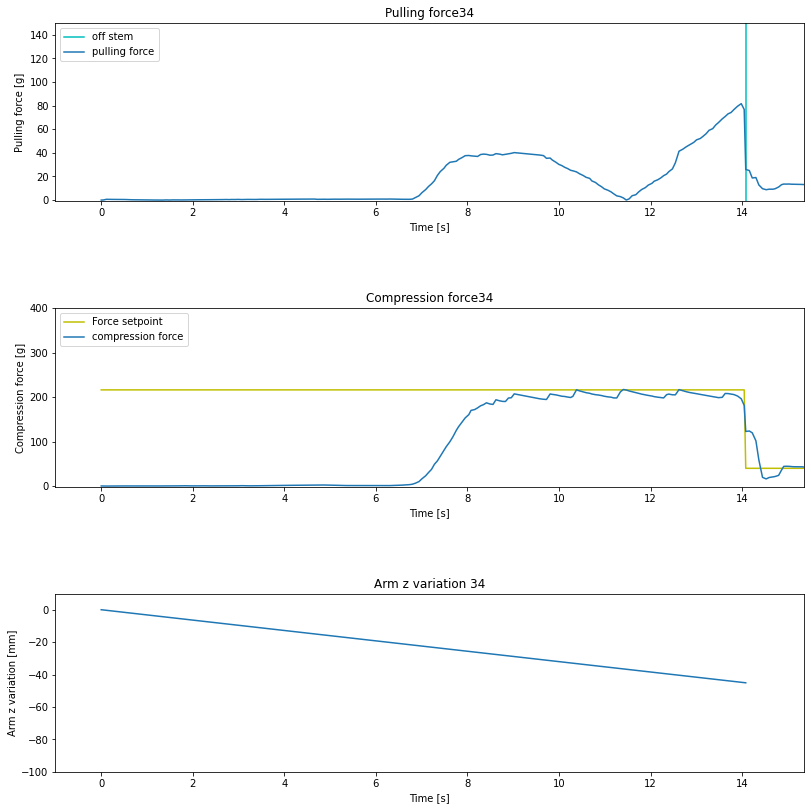

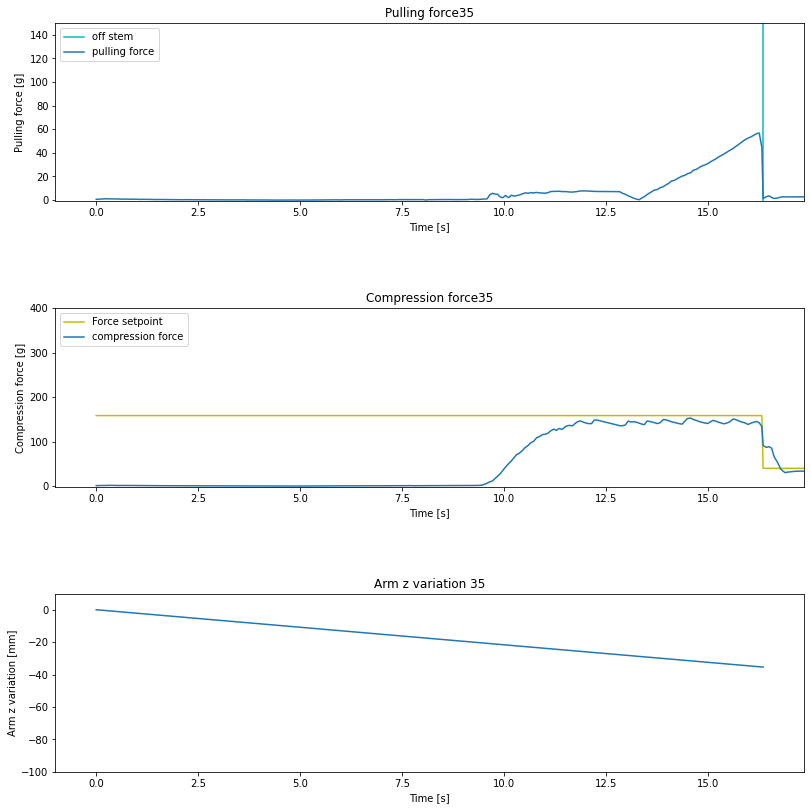

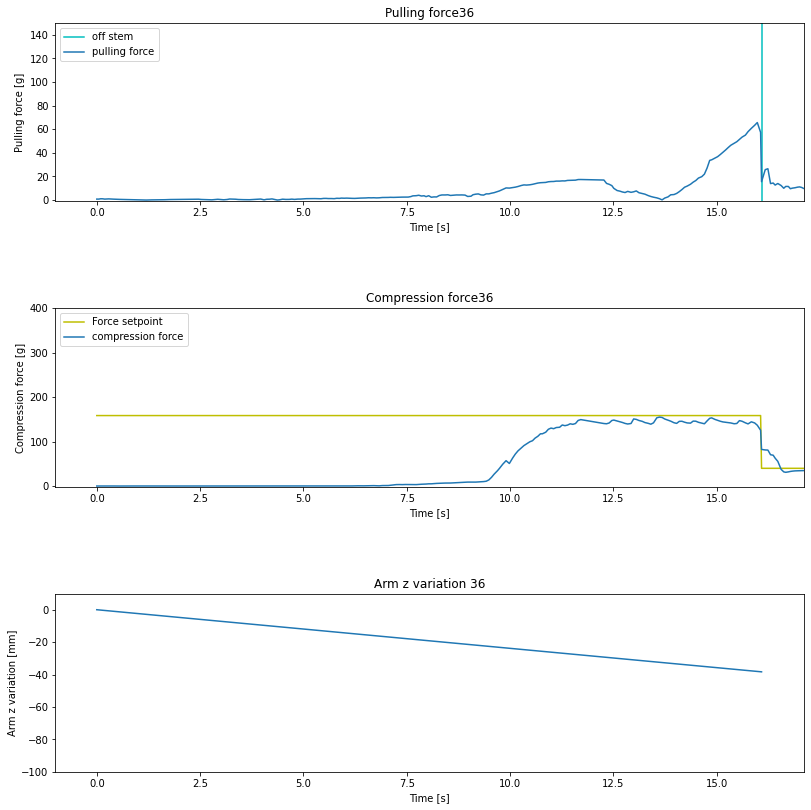

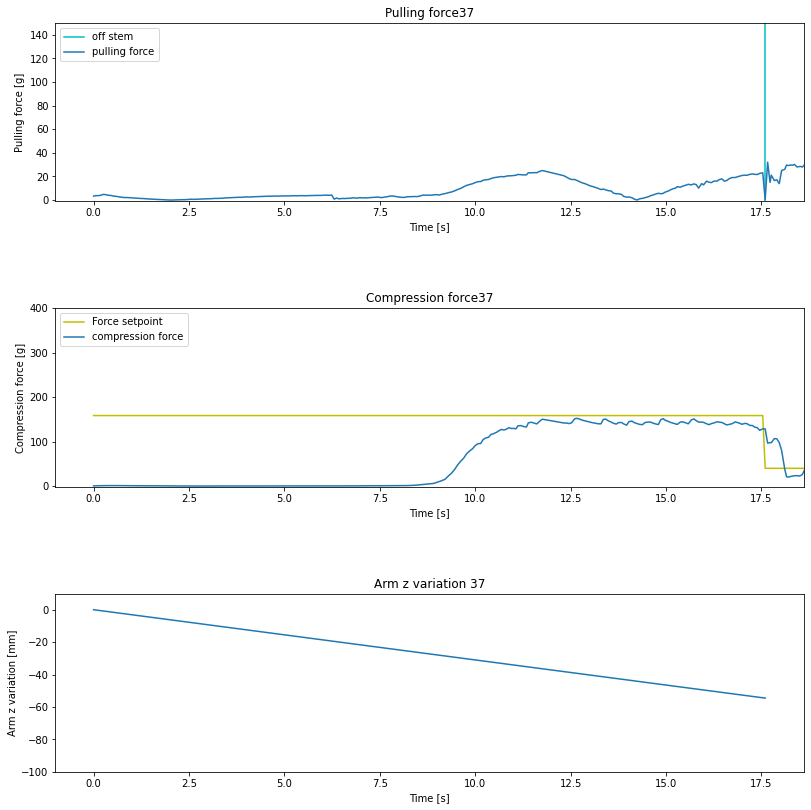

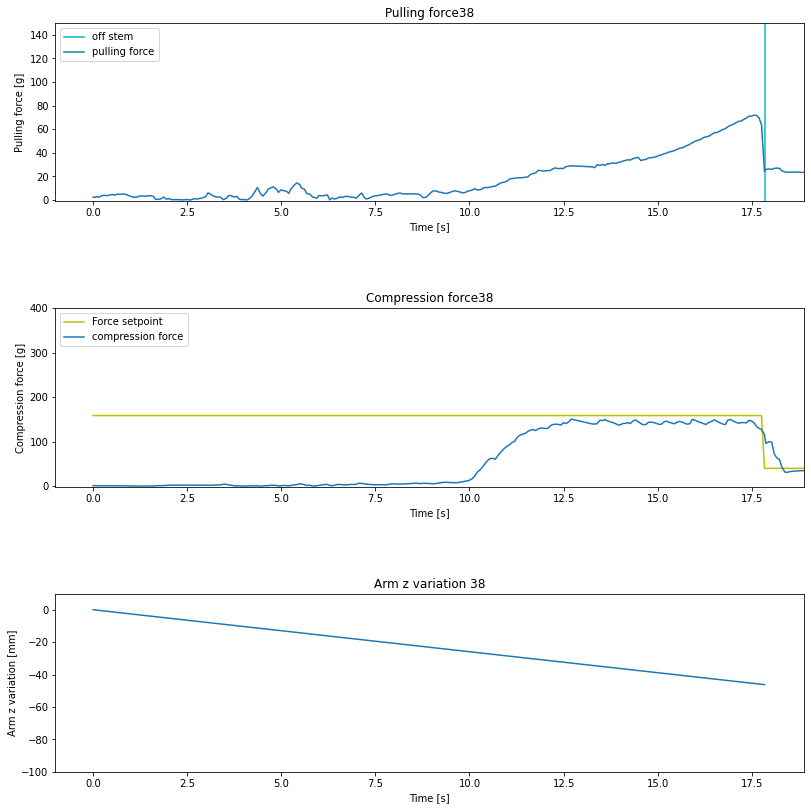

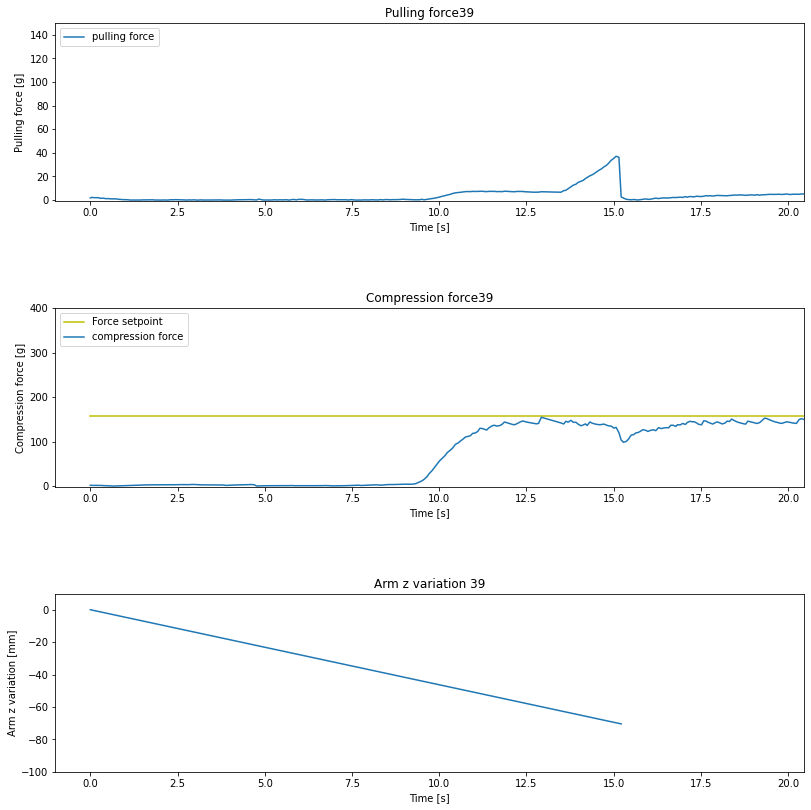

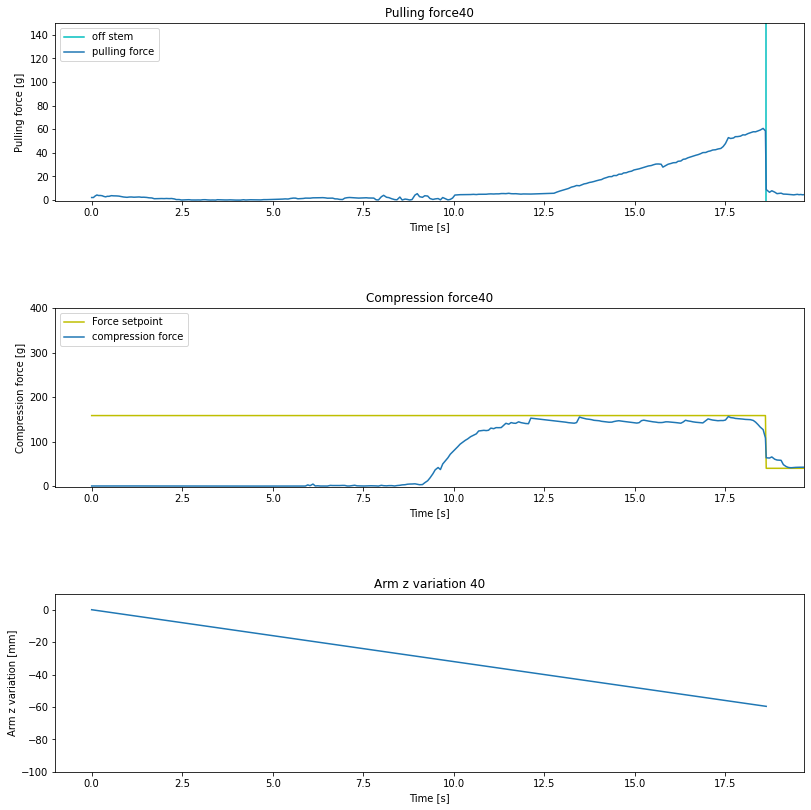

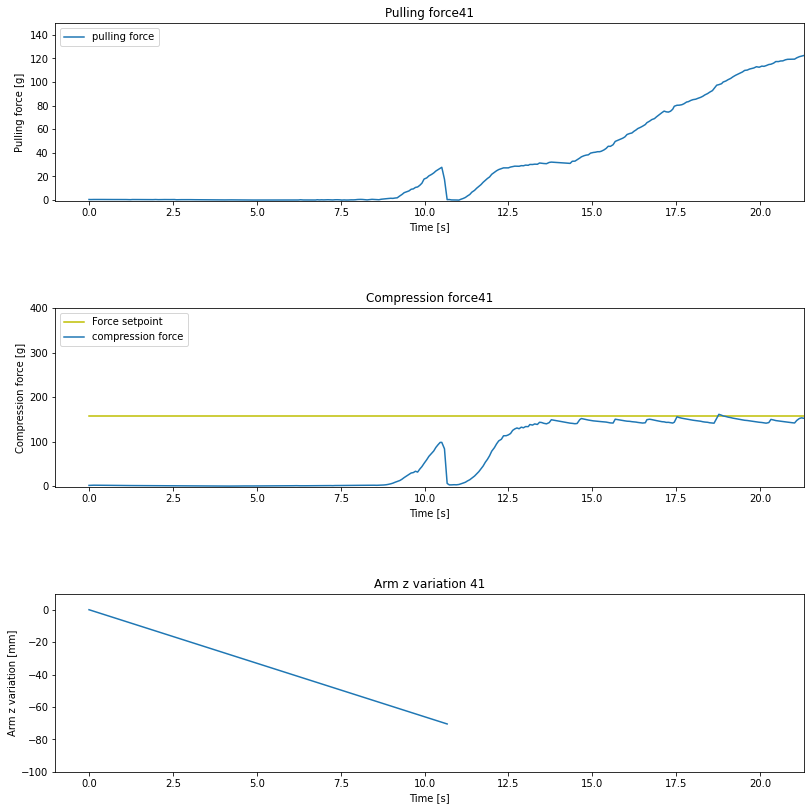

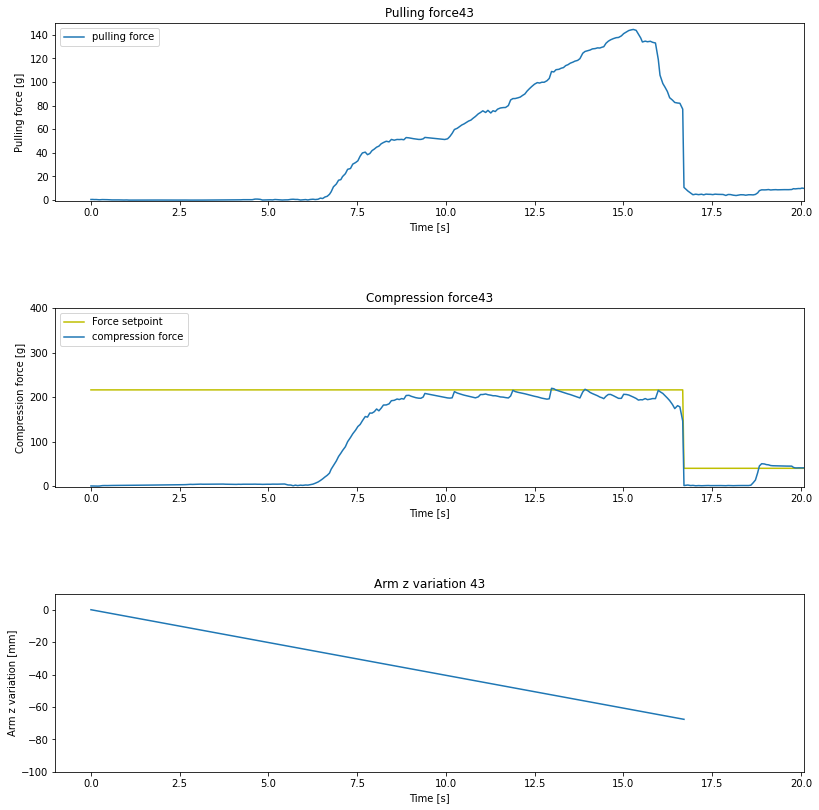

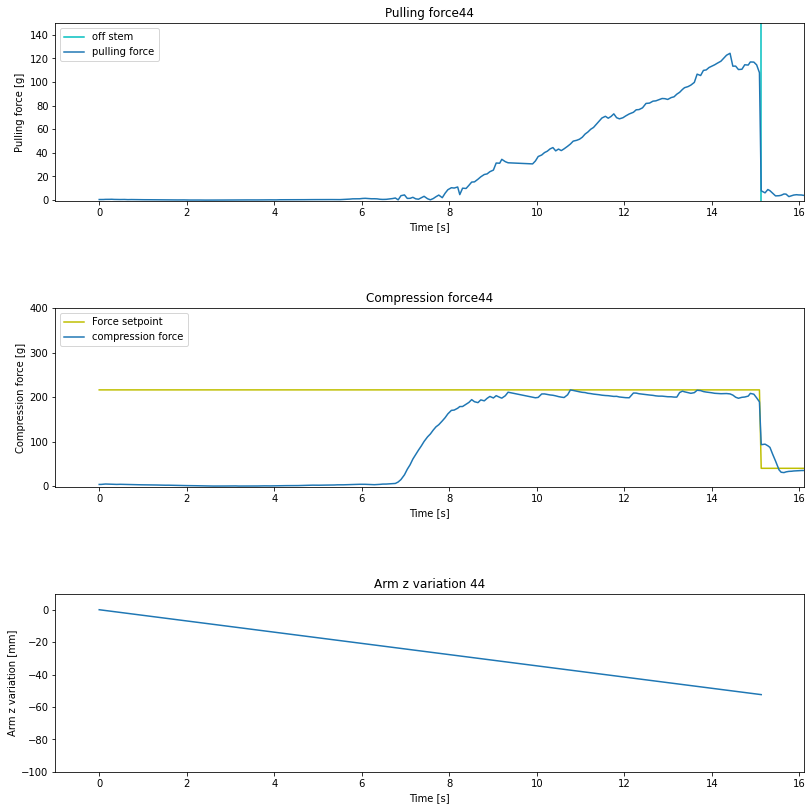

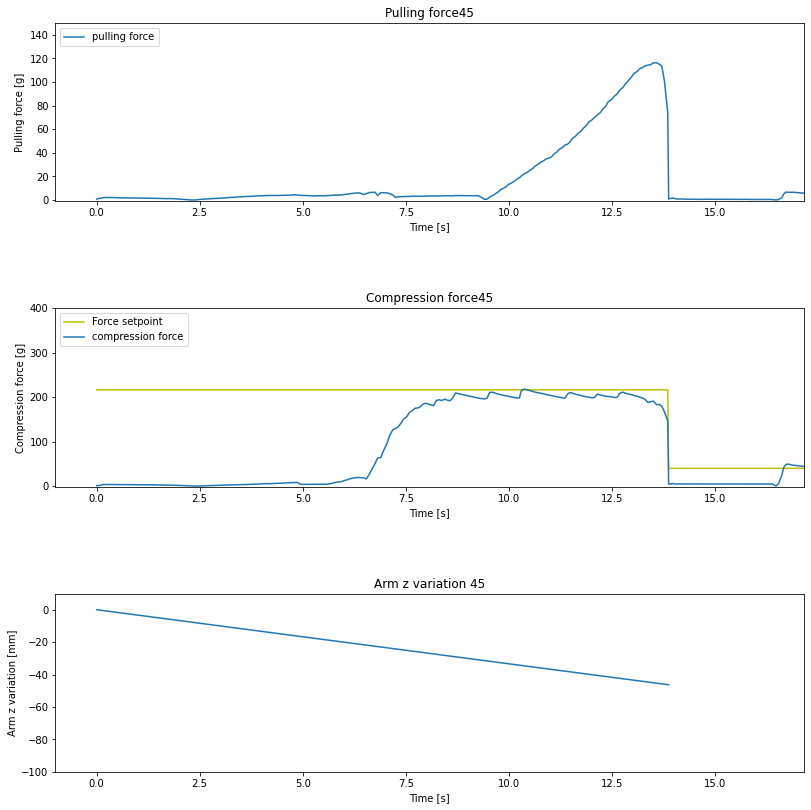

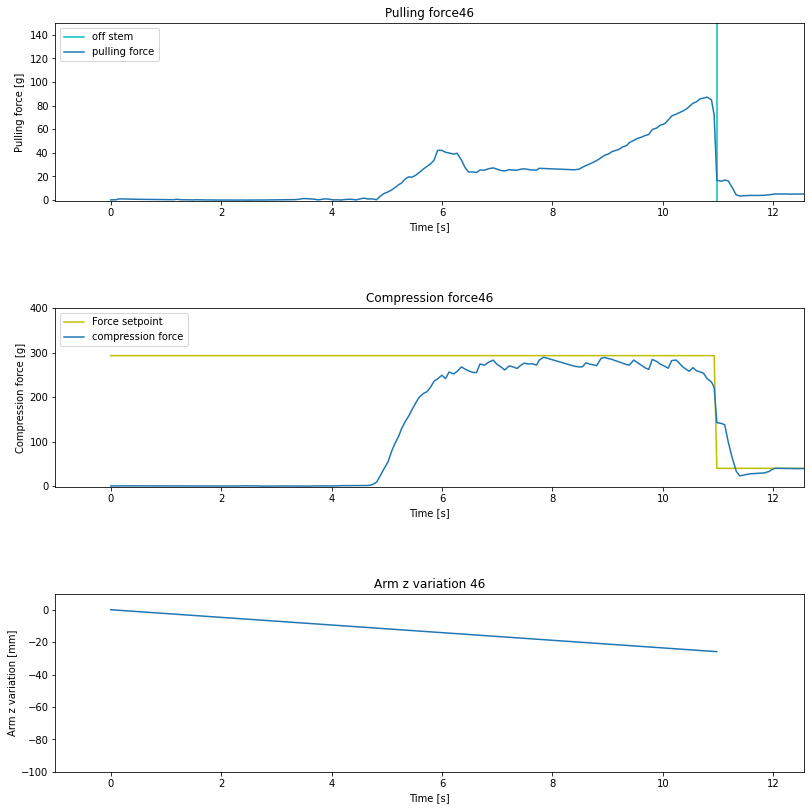

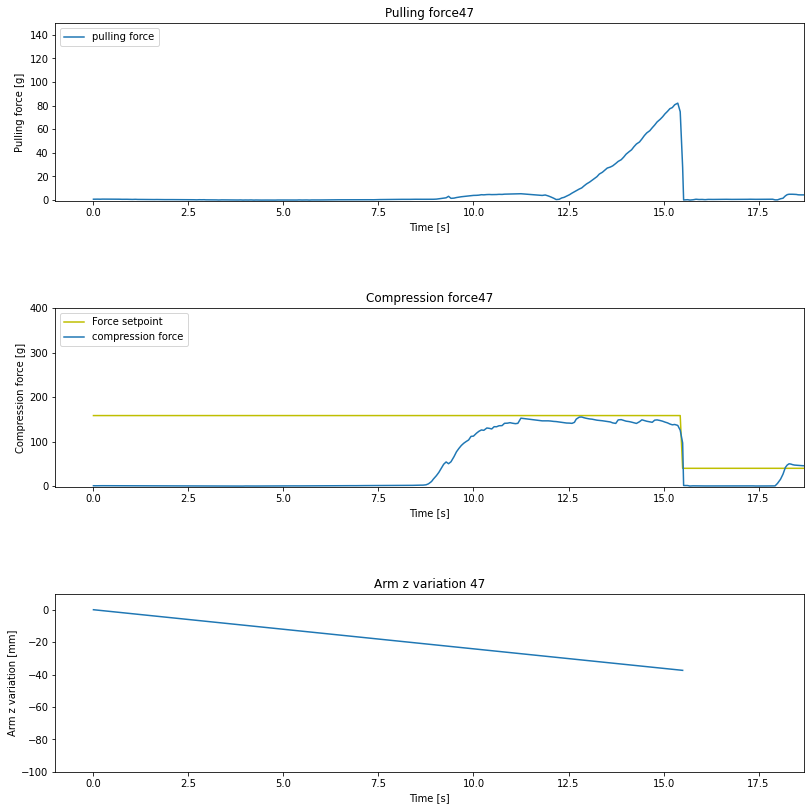

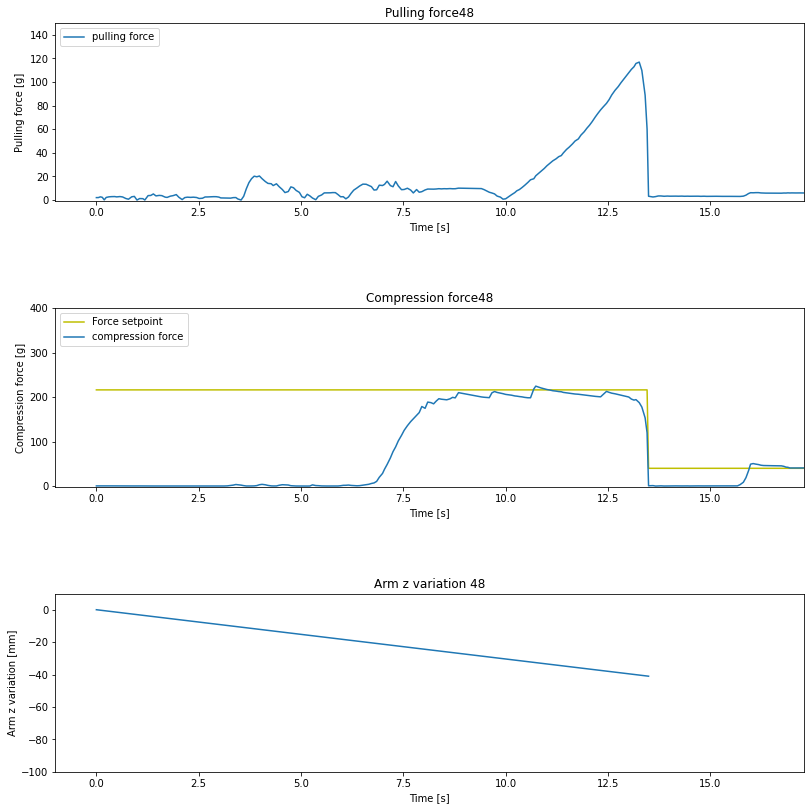

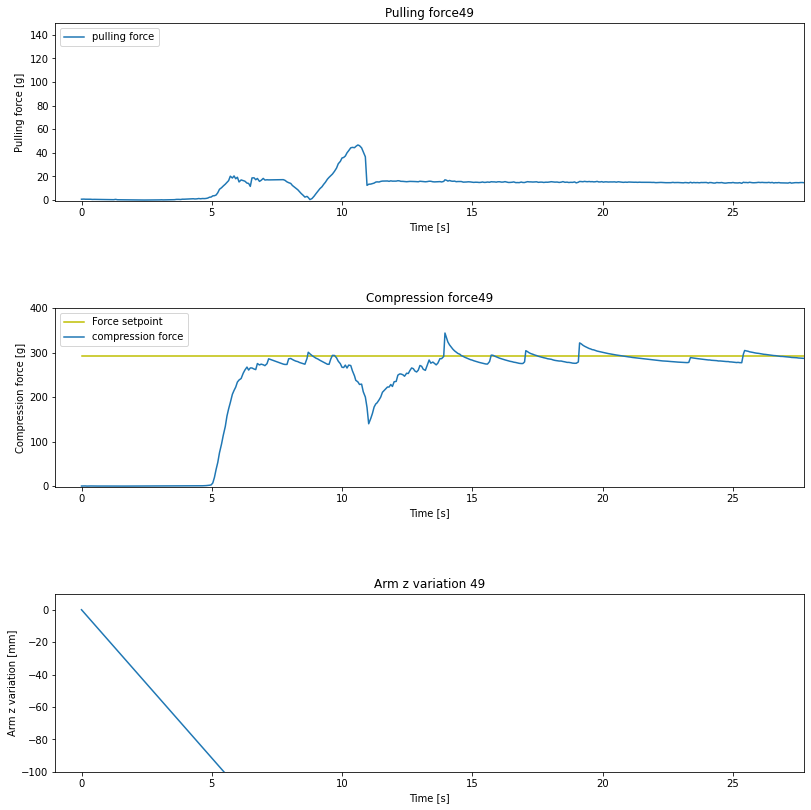

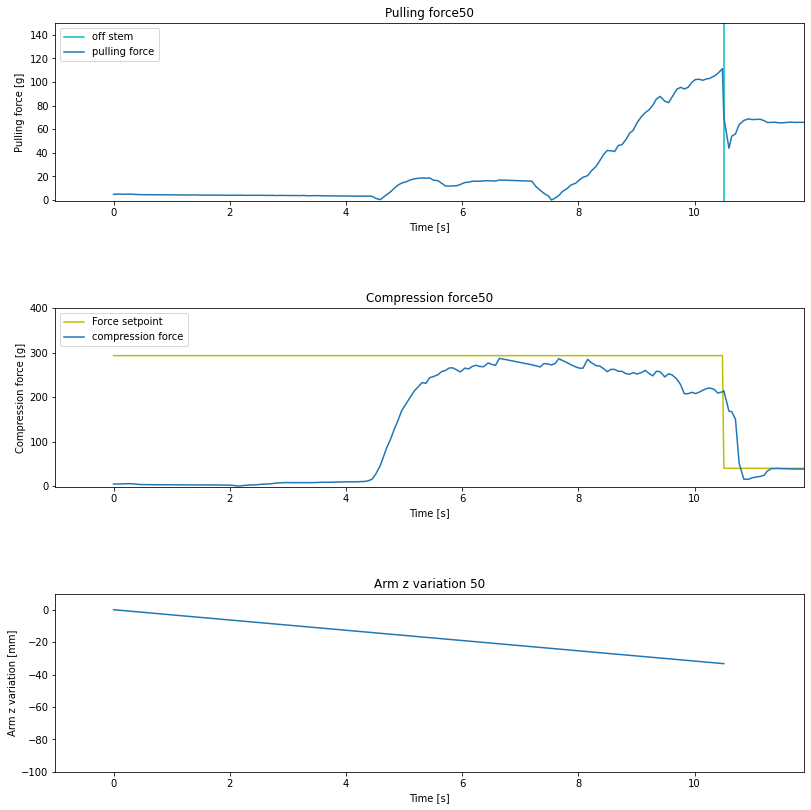

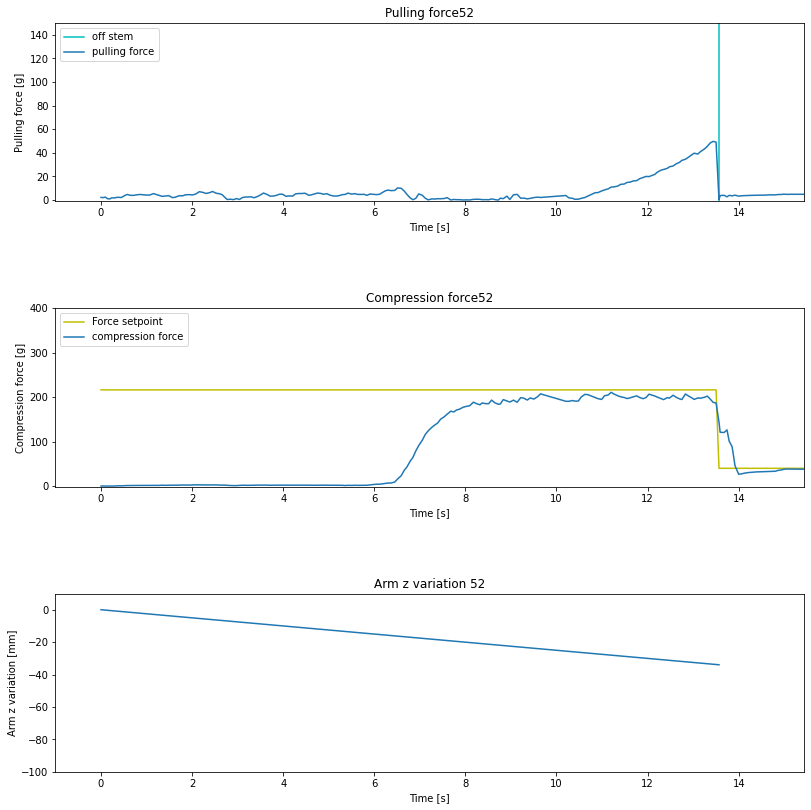

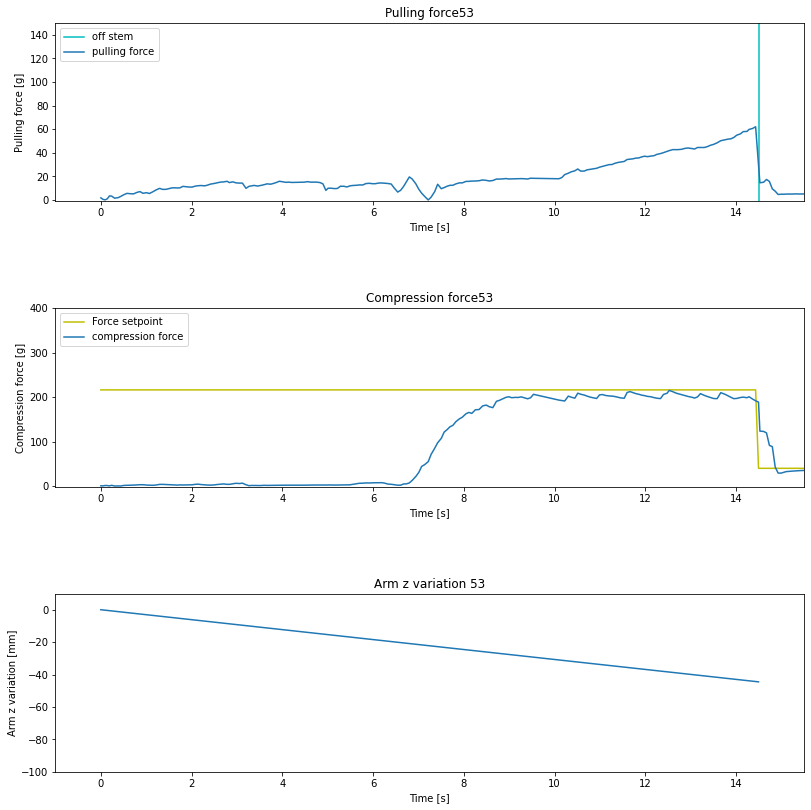

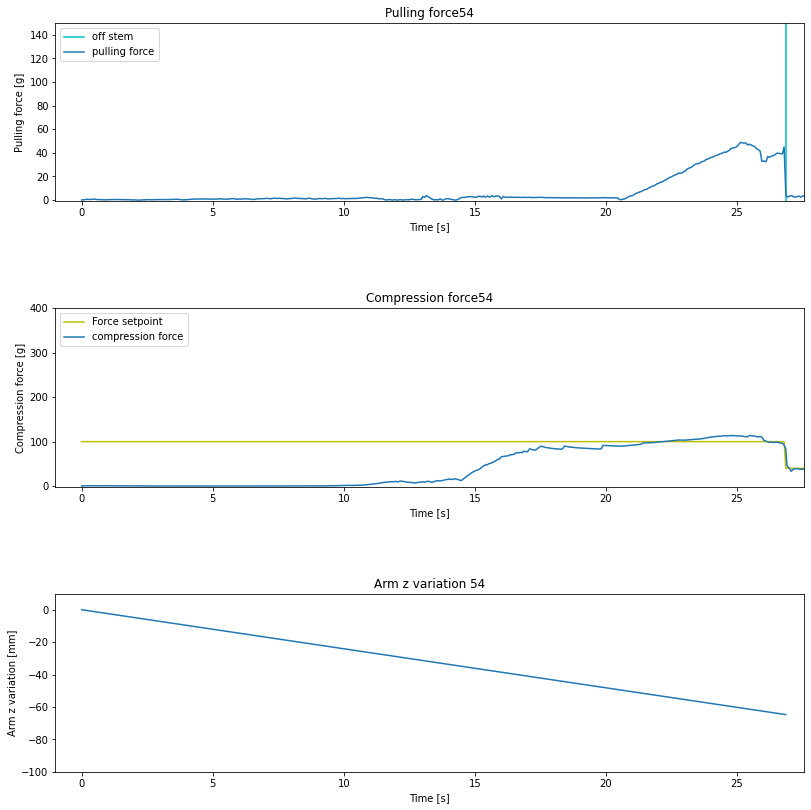

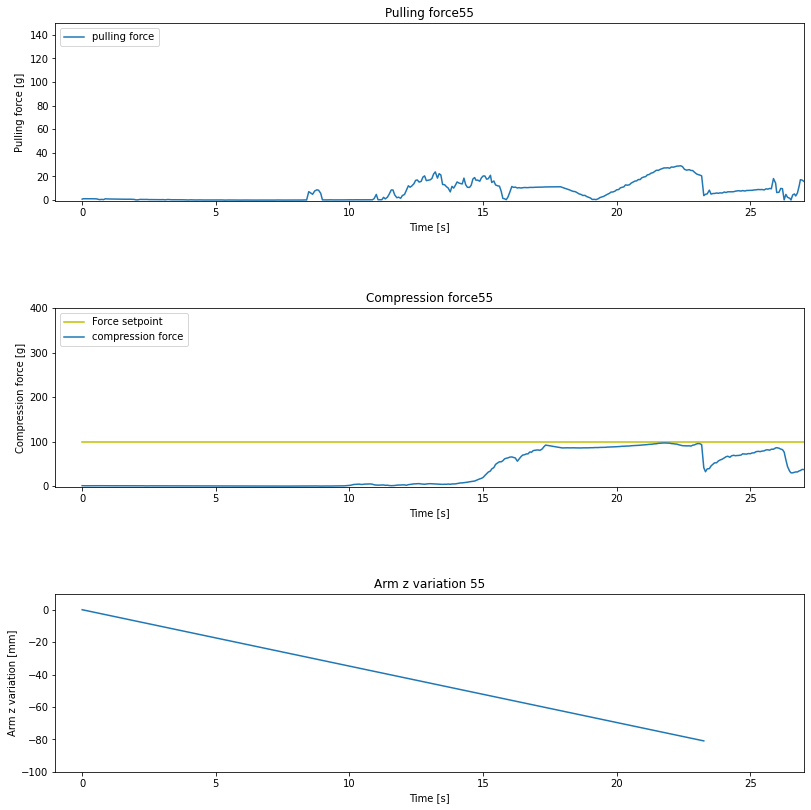

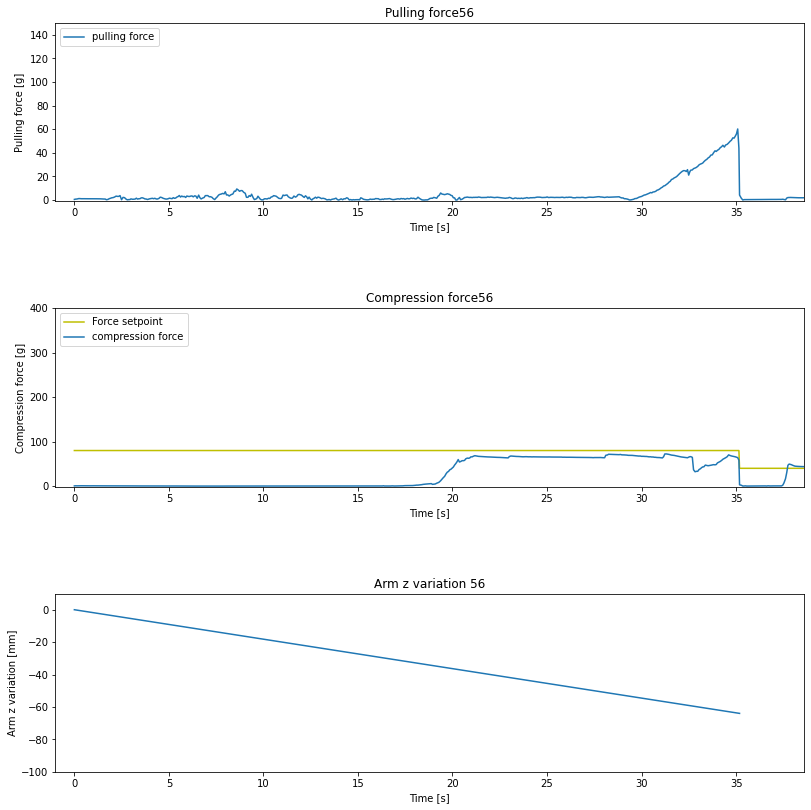

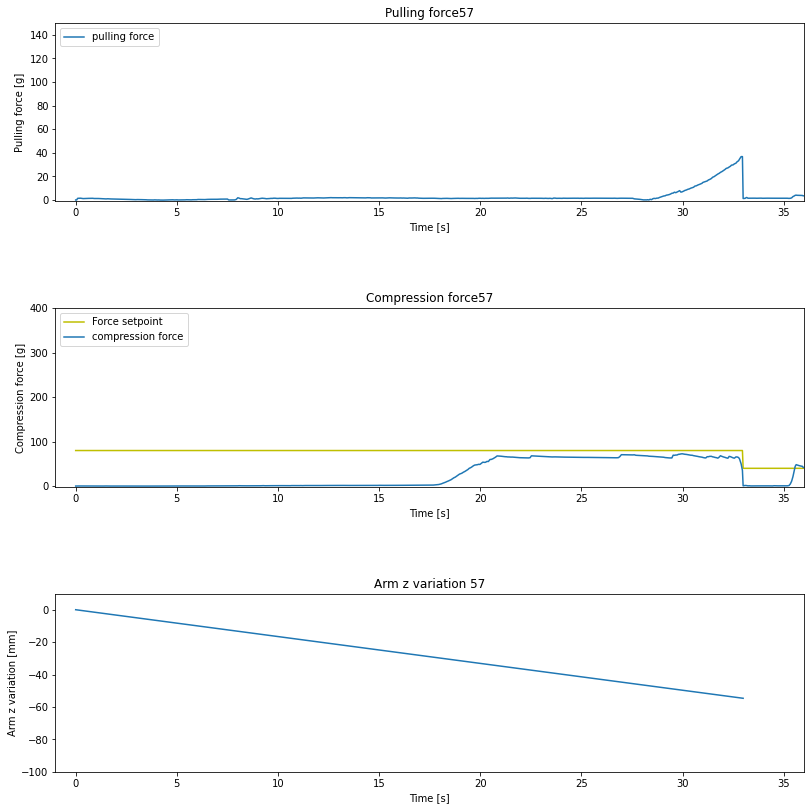

In [10]:
data_pull = [pull_force17,pull_force18,pull_force19,pull_force20,pull_force22,pull_force23,pull_force25,pull_force26,pull_force28,pull_force30,pull_force31,pull_force32,pull_force33,pull_force34,pull_force35,pull_force36,pull_force37,pull_force38,pull_force39,pull_force40,pull_force41,pull_force43,pull_force44,pull_force45,pull_force46,pull_force47,pull_force48,pull_force49,pull_force50,pull_force52,pull_force53,pull_force54,pull_force55,pull_force56,pull_force57]
data_comp = [comp_force17,comp_force18,comp_force19,comp_force20,comp_force22,comp_force23,comp_force25,comp_force26,comp_force28,comp_force30,comp_force31,comp_force32,comp_force33,comp_force34,comp_force35,comp_force36,comp_force37,comp_force38,comp_force39,comp_force40,comp_force41,comp_force43,comp_force44,comp_force45,comp_force46,comp_force47,comp_force48,comp_force49,comp_force50,comp_force52,comp_force53,comp_force54,comp_force55,comp_force56,comp_force57]
data_displacement = [z_pos17,z_pos18,z_pos19,z_pos20,z_pos22,z_pos23,z_pos25,z_pos26,z_pos28,z_pos30,z_pos31,z_pos32,z_pos33,z_pos34,z_pos35,z_pos36,z_pos37,z_pos38,z_pos39,z_pos40,z_pos41,z_pos43,z_pos44,z_pos45,z_pos46,z_pos47,z_pos48,z_pos49,z_pos50,z_pos52,z_pos53,z_pos54,z_pos55,z_pos56,z_pos57]
times = [time_vector17,time_vector18,time_vector19,time_vector20,time_vector22,time_vector23,time_vector25,time_vector26,time_vector28,time_vector30,time_vector31,time_vector32,time_vector33,time_vector34,time_vector35,time_vector36,time_vector37,time_vector38,time_vector39,time_vector40,time_vector41,time_vector43,time_vector44,time_vector45,time_vector46,time_vector47,time_vector48,time_vector49,time_vector50,time_vector52,time_vector53,time_vector54,time_vector55,time_vector56,time_vector57]

open_pos = 5000
closed_pos = 3600
# fig = [fig_1,fig_2,fig_3,fig_4]

for j in range(len(times)):
    fig, axs = plt.subplots(3, 1)
    fig.set_size_inches(13,13)
    for i in range(3):
        plottime = np.array(times[j])-times[j][0]
        if i == 0:
            data = data_pull.copy()
            if j in [0,1,4,6,13,14,15,16,17,19,22,24,28,29,30,31]:
                axs[i].axvline(x = plottime[offstem_idx[j]], color = 'c',label='off stem')
            axs[i].plot(plottime, data[j], label='pulling force')
            axs[i].set_ylabel("Pulling force [g]")
            axs[i].set_ylim([-1, 150])
            axs[i].set_title("Pulling force"+dirs[j])
            axs[i].legend(loc="upper left")
        if i == 1:
            data = data_comp.copy()
            Fd_vector = np.ones_like(data[j])*Fd[j][0]
            if j == 1:
                Fd_vector = np.ones(data[j].index(133.1))*Fd[j][0]
                Fd_vector = np.append(Fd_vector, np.ones(len(data[j])-data[j].index(133.1))*Fd[j][1])
            if j == 3:
                Fd_vector = np.ones(data[j].index(141.9))*Fd[j][0]
                Fd_vector = np.append(Fd_vector, np.ones(len(data[j])-data[j].index(141.9))*Fd[j][1])
            if j in [0, 1, 3, 4, 6, 13, 14, 15, 16, 17, 19, 21, 22, 23, 24, 25, 26, 28, 29, 30, 31, 33, 34]:
                Fd_vector[offstem_idx[j]::] = 40
            axs[i].plot(plottime, Fd_vector, 'y', label='Force setpoint')
            # axs[i].axvline(x = plottime[offstem_idx[i]], color = 'c',label='off stem')
            axs[i].plot(plottime, data[j], label='compression force')
            axs[i].set_xlabel('Time [s]')
            axs[i].set_ylabel("Compression force [g]")
            axs[i].set_ylim([-1, 400])
            axs[i].set_title("Compression force"+dirs[j])
            axs[i].legend(loc="upper left")
        if i == 2:
            data = data_displacement.copy()
            # data[j].append(data[j][0])
            axs[i].plot([plottime[0],plottime[offstem_idx[j]]], (np.array(data[j])-data[j][0])*1000, label='gripper postion')
            axs[i].set_ylabel("Arm z variation [mm]")
            axs[i].set_ylim([-100, 10])
            axs[i].set_title("Arm z variation "+dirs[j])
        axs[i].set_xlabel('Time [s]')
        axs[i].set_xlim([-1, plottime[-1]])
        # axs[i].legend(loc="center right")
        # axs[i].legend(loc="upper right")

        plt.subplots_adjust(left=0.1,
                            bottom=0.1, 
                            right=0.9, 
                            top=0.9, 
                            wspace=0.4, 
                            hspace=0.6)